In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

In [4]:
train_dir = r"C:\Users\Pavan\Downloads\crops"  
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',  
    subset='training'  
)
valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)

Found 3750 images belonging to 2 classes.
Found 937 images belonging to 2 classes.


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

C:\Users\Pavan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    loss='binary_crossentropy',  
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,563,713 (36.48 MB)

 Trainable params: 9,563,713 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20, 
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size)
validation_loss, validation_accuracy = model.evaluate(valid_generator)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

C:\Users\Pavan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.7963 - loss: 0.5326 - val_accuracy: 0.9170 - val_loss: 0.1868
Epoch 2/8
  1/117 ━━━━━━━━━━━━━━━━━━━━ 28s 243ms/step - accuracy: 0.9375 - loss: 0.2209

C:\Users\Pavan\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


117/117 ━━━━━━━━━━━━━━━━━━━━ 39s 334ms/step - accuracy: 0.9375 - loss: 0.2209 - val_accuracy: 0.9504 - val_loss: 0.1353
Epoch 3/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.9522 - loss: 0.1234 - val_accuracy: 0.9741 - val_loss: 0.0871
Epoch 4/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 42s 358ms/step - accuracy: 0.9375 - loss: 0.1187 - val_accuracy: 0.9601 - val_loss: 0.1069
Epoch 5/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.9580 - loss: 0.1242 - val_accuracy: 0.9752 - val_loss: 0.0835
Epoch 6/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 42s 360ms/step - accuracy: 0.9688 - loss: 0.0836 - val_accuracy: 0.9709 - val_loss: 0.0897
Epoch 7/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9642 - loss: 0.1053 - val_accuracy: 0.9784 - val_loss: 0.0647
Epoch 8/8
117/117 ━━━━━━━━━━━━━━━━━━━━ 41s 349ms/step - accuracy: 0.9375 - loss: 0.1326 - val_accuracy: 0.9741 - val_loss: 0.0649
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9666 - loss: 0.0908
Validation Accuracy: 97.55%


In [8]:
true_labels = valid_generator.classes
valid_generator.reset()  
predictions = model.predict(valid_generator, steps=valid_generator.samples // valid_generator.batch_size + 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()
precision = precision_score(true_labels, predicted_labels, pos_label=1)
recall = recall_score(true_labels, predicted_labels, pos_label=1)
f1 = f1_score(true_labels, predicted_labels, pos_label=1)
print(f"Precision:{precision:.2f}")                                                                      
print(f"Recall:{recall:.2f}")                     
print(f"F1-Score:{f1:.2f}")                           

30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step
Precision:0.80
Recall:0.83
F1-Score:0.81


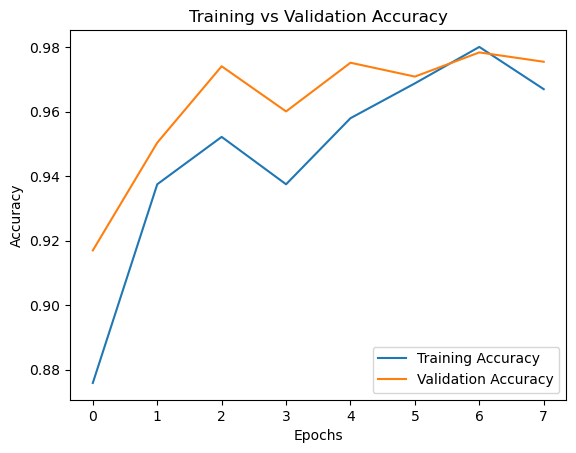

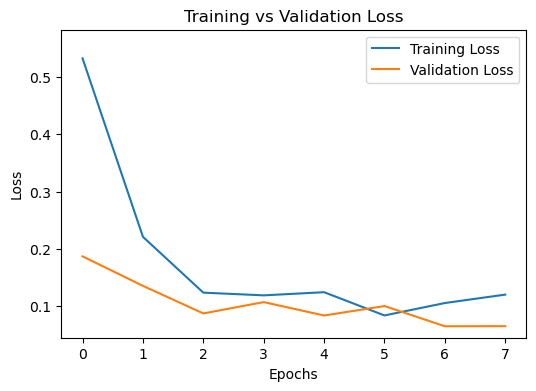

In [1]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


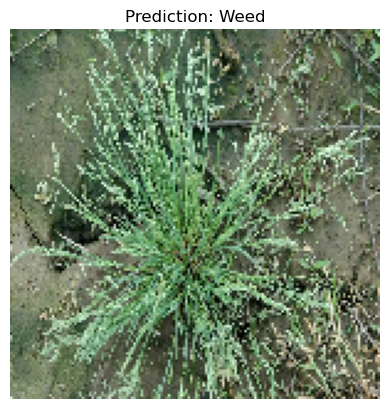

In [11]:
test_image_path = r"C:\Users\Pavan\Downloads\weed.webp" 
img = image.load_img(test_image_path, target_size=(150, 150))  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array = img_array / 255.0  
prediction = model.predict(img_array)
if prediction[0]>0.5:
    classification = "Crop"
else:
    classification = "Weed"
plt.imshow(img)
plt.axis('off')  
plt.title(f"Prediction: {classification}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


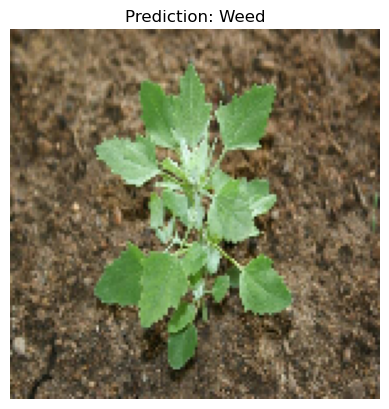

In [12]:
test_image_path = r"C:\Users\Pavan\Downloads\weed.webp" 
img = image.load_img(test_image_path, target_size=(150, 150))  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array = img_array / 255.0  
prediction = model.predict(img_array)
if prediction[0]>0.5:
    classification = "Crop"
else:
    classification = "Weed"
plt.imshow(img)
plt.axis('off')  
plt.title(f"Prediction: {classification}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


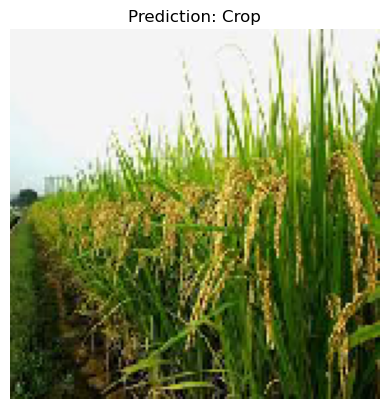

In [16]:
test_image_path = r"C:\Users\Pavan\Downloads\weed.webp" 
img = image.load_img(test_image_path, target_size=(150, 150))  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array = img_array / 255.0  
prediction = model.predict(img_array)
if prediction[0]>0.5:
    classification = "Crop"
else:
    classification = "Weed"
plt.imshow(img)
plt.axis('off')  
plt.title(f"Prediction: {classification}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


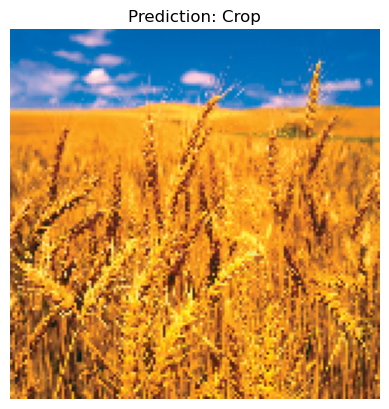

In [15]:
test_image_path = r"C:\Users\Pavan\Downloads\weed.webp" 
img = image.load_img(test_image_path, target_size=(150, 150))  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array = img_array / 255.0  
prediction = model.predict(img_array)
if prediction[0]>0.5:
    classification = "Crop"
else:
    classification = "Weed"
plt.imshow(img)
plt.axis('off')  
plt.title(f"Prediction: {classification}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


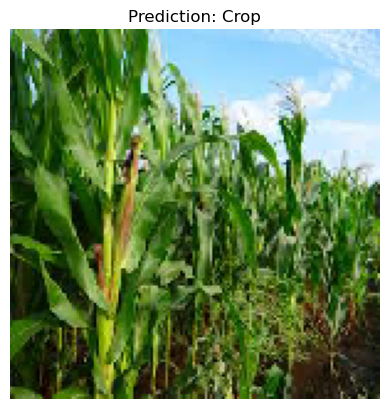

In [115]:
test_image_path = r"C:\Users\Pavan\Downloads\weed.webp" 
img = image.load_img(test_image_path, target_size=(150, 150))  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array = img_array / 255.0  
prediction = model.predict(img_array)
if prediction[0]>0.5:
    classification = "Crop"
else:
    classification = "Weed"
plt.imshow(img)
plt.axis('off')  
plt.title(f"Prediction: {classification}")
plt.show()

In [ ]:
model.save("cnn_model.keras")